# Logistic Regression Project (Predict Ad click)

En este notebook vamos a aplicar la `Regresión logística` para indicar si un usuario de internet va a clickar en uno de nuestros anuncios. Vamos a intentar crear un modelo que consiga predecir esto en base a las caracteristicas del usuario.

Hablemos de las columnas/features que tenemos disponibles:

* '`Daily Time Spent on Site`': tiempo consumido en la web en minutos
* '`Age`': la edad del usuario en años
* '`Area Income`': el ingreso medio del área geográfica del usuario
* '`Daily Internet Usage`': Minutos de media que el usuario usa/consume intenet
* '`Ad Topic Line`': Headline del anuncio (investiga que puede ser esto!)
* '`City`': Ciudad del usuario
* '`Male`': Indicador si el usuario es o no un hombre
* '`Country`': País del usuario
* '`Timestamp`': Hora a la que el usuario ha clickado en la publicidad o ha cerrado la ventana. 
* '`Clicked on Ad`': Indicador si finalmente ha clickado o no en la publicidad.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Descarga y carga los datos

In [3]:
anuncios = pd.read_csv("data/advertising.csv")

# 1. Exploratory Data Analysis (Descriptores + visualizaciones exploratorias)

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [5]:
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
anuncios.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
anuncios.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
anuncios.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

C:\Users\arica\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[<AxesSubplot:title={'center':'Daily Time Spent on Site'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Area Income'}>,
        <AxesSubplot:title={'center':'Daily Internet Usage'}>]],
      dtype=object)

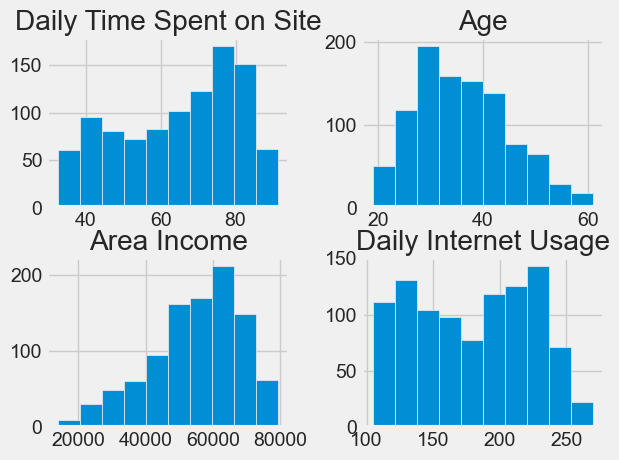

In [9]:
anuncios.drop(["Ad Topic Line", "City", "Male", "Country", "Clicked on Ad"], 1).hist()

In [10]:
anuncios["Timestamp"] = anuncios["Timestamp"].astype("datetime64[ns]")

<AxesSubplot:>

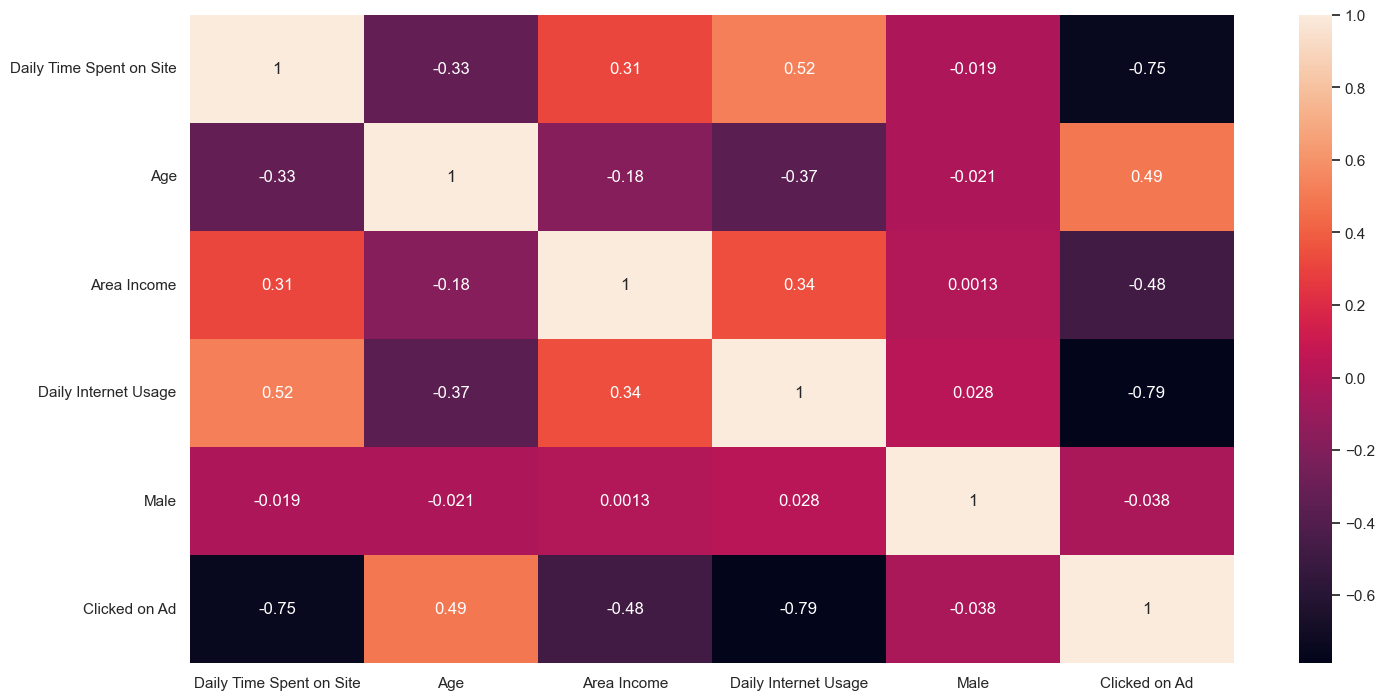

In [11]:
sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(anuncios.corr(), annot=True)

In [12]:
anuncios.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


# 2. Prepara tus datos para la Logistic Regression



#### 1. Feature engineering



#### 2. Separación Train-test 


In [13]:
x = anuncios[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]]
y = anuncios[["Clicked on Ad"]]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [15]:
print("Total features shape:", x.shape)
print("Train features shape:", x_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", x_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (1000, 4)
Train features shape: (800, 4)
Train target shape: (800, 1)
Test features shape: (200, 4)
Test target shape: (200, 1)



#### 3. StandardScaler()


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)

# 3. Implementa la Logistic Regression en Scikit-Learn y a predecir!

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scal, y_train)

c:\Users\arica\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(x_test_scal)
print(y_pred)

[1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1]


# 4. Evalúa los modelos que lances


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score

In [36]:
print("Accuracy score:", round(accuracy_score(y_pred, y_test), 3))

Accuracy score: 0.95



#### 1. Matriz de confusión


In [27]:
confu = confusion_matrix(y_test, y_pred)

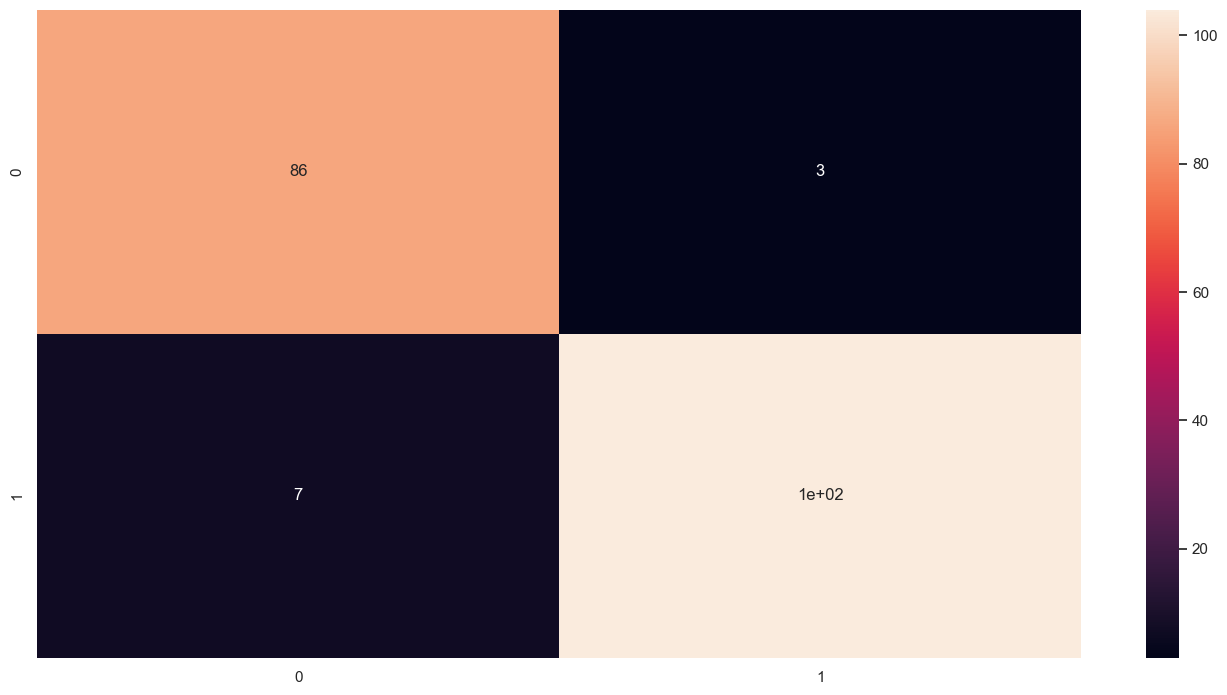

In [28]:
sns.heatmap(confu, annot=True);

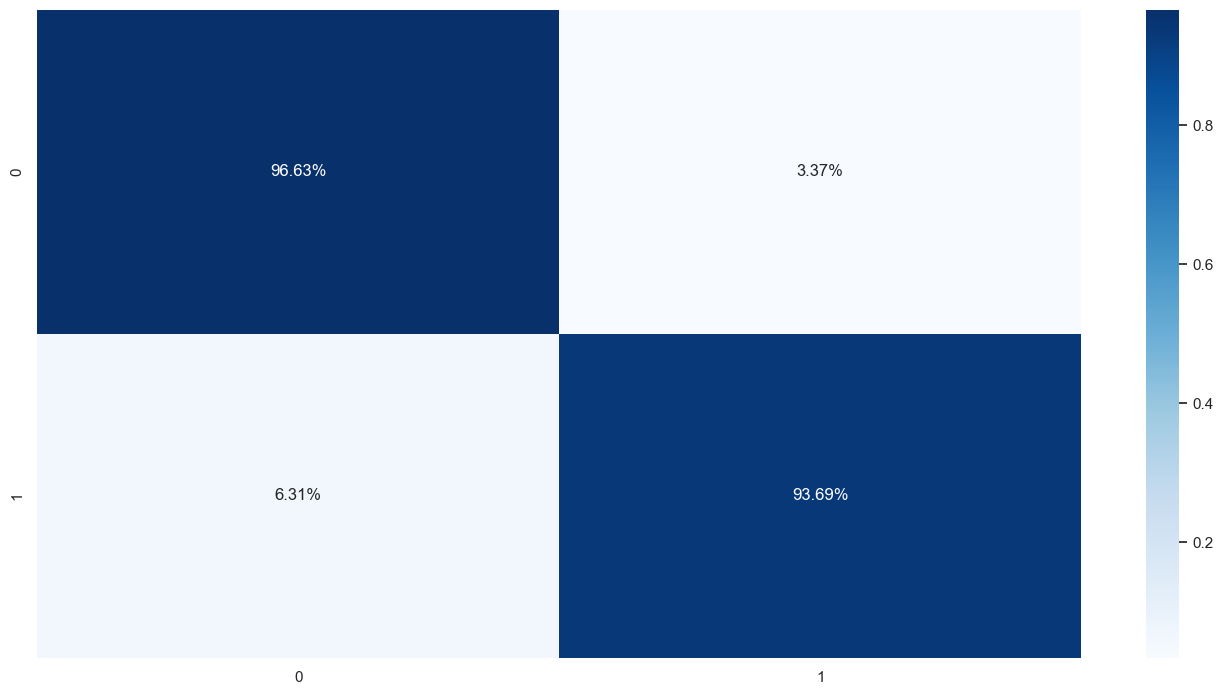

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');


#### 2. Precision


In [30]:
print("Precision score:", round(precision_score(y_pred, y_test), 3))

Precision score: 0.937


TP/(TP+FP)



#### 3. Recall


In [31]:
print("Recall score:", round(recall_score(y_pred, y_test), 3))

Recall score: 0.972




#### 4. F1 Score


In [32]:
print("F1 score:", round(f1_score(y_pred, y_test), 3))

F1 score: 0.954




#### 5. ROC curve (píntala también!)

In [37]:
print("AUC:", round(roc_auc_score(y_pred, y_test), 3))

AUC: 0.948


In [33]:
print("ROC Curve:", roc_curve(y_pred,y_test))

ROC Curve: (array([0.        , 0.07526882, 1.        ]), array([0.        , 0.97196262, 1.        ]), array([2, 1, 0], dtype=int64))


In [38]:
y_pred_proba = model.predict_proba(x_test_scal)
y_pred_proba[:,1]

array([0.98833121, 0.99963025, 0.99914922, 0.99515132, 0.00842319,
       0.40596946, 0.02900217, 0.9998407 , 0.01314573, 0.99993923,
       0.00661748, 0.9992326 , 0.99991975, 0.00954372, 0.99964742,
       0.99996029, 0.99998974, 0.99704468, 0.03079672, 0.99987411,
       0.00653336, 0.98636169, 0.99997624, 0.15998662, 0.00605424,
       0.99998634, 0.03732577, 0.00473124, 0.99990794, 0.99890308,
       0.10640896, 0.57292438, 0.01207587, 0.97757948, 0.99993845,
       0.01731963, 0.00904979, 0.70958049, 0.99956986, 0.99998011,
       0.01455442, 0.99995106, 0.49958004, 0.99996518, 0.01575896,
       0.0954925 , 0.98455576, 0.99998256, 0.19094335, 0.99980231,
       0.99998127, 0.02778573, 0.9983761 , 0.02732459, 0.00904399,
       0.01638689, 0.01085469, 0.99997816, 0.01344974, 0.9997708 ,
       0.00527967, 0.9981546 , 0.01886061, 0.99996811, 0.99733436,
       0.99952397, 0.99998318, 0.01609543, 0.99639274, 0.99981232,
       0.99815466, 0.99606132, 0.82565387, 0.03638522, 0.89513

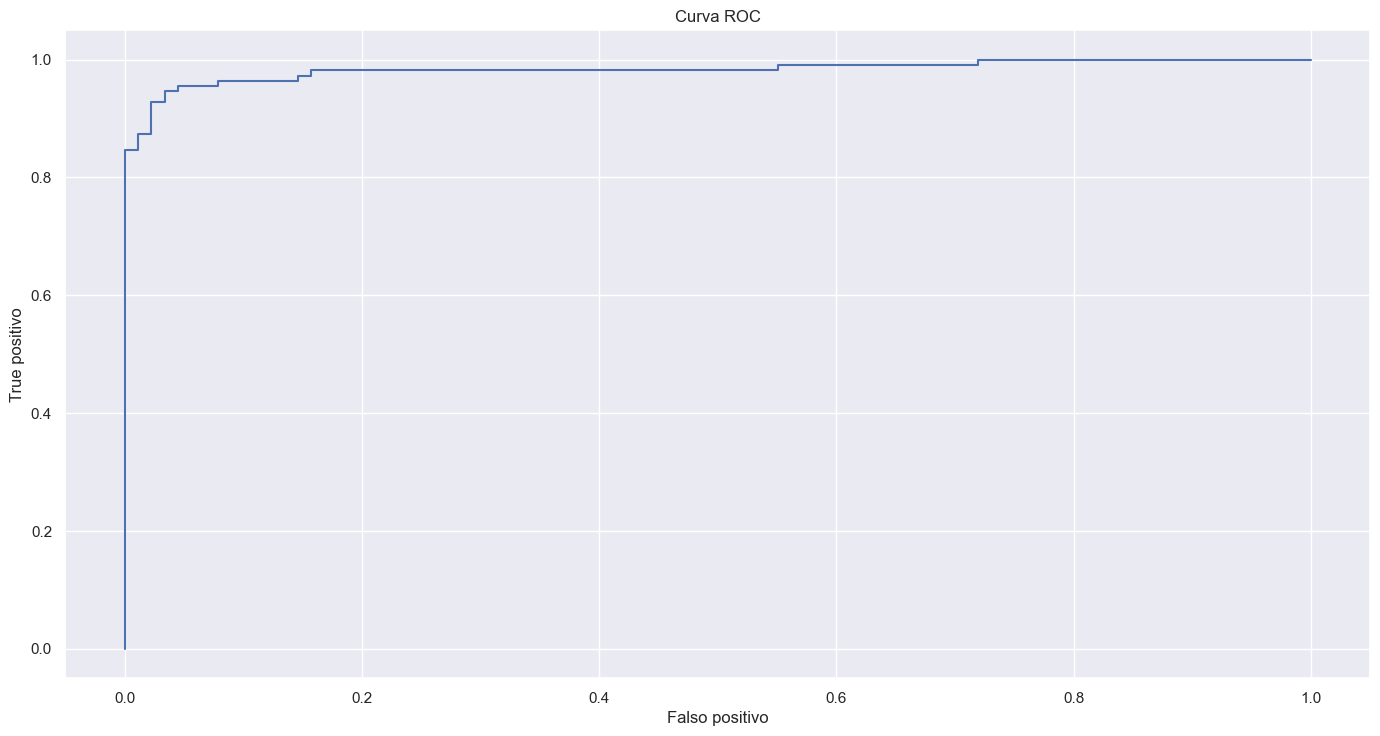

In [40]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel("Falso positivo")
plt.ylabel("True positivo")
plt.title("Curva ROC")
plt.legend
plt.show()



#### 6. P-R curve

In [35]:
print(precision_recall_curve(y_test, y_pred))

(array([0.555     , 0.97196262, 1.        ]), array([1.        , 0.93693694, 0.        ]), array([0, 1], dtype=int64))


In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_test,y_pred_proba[:,1])

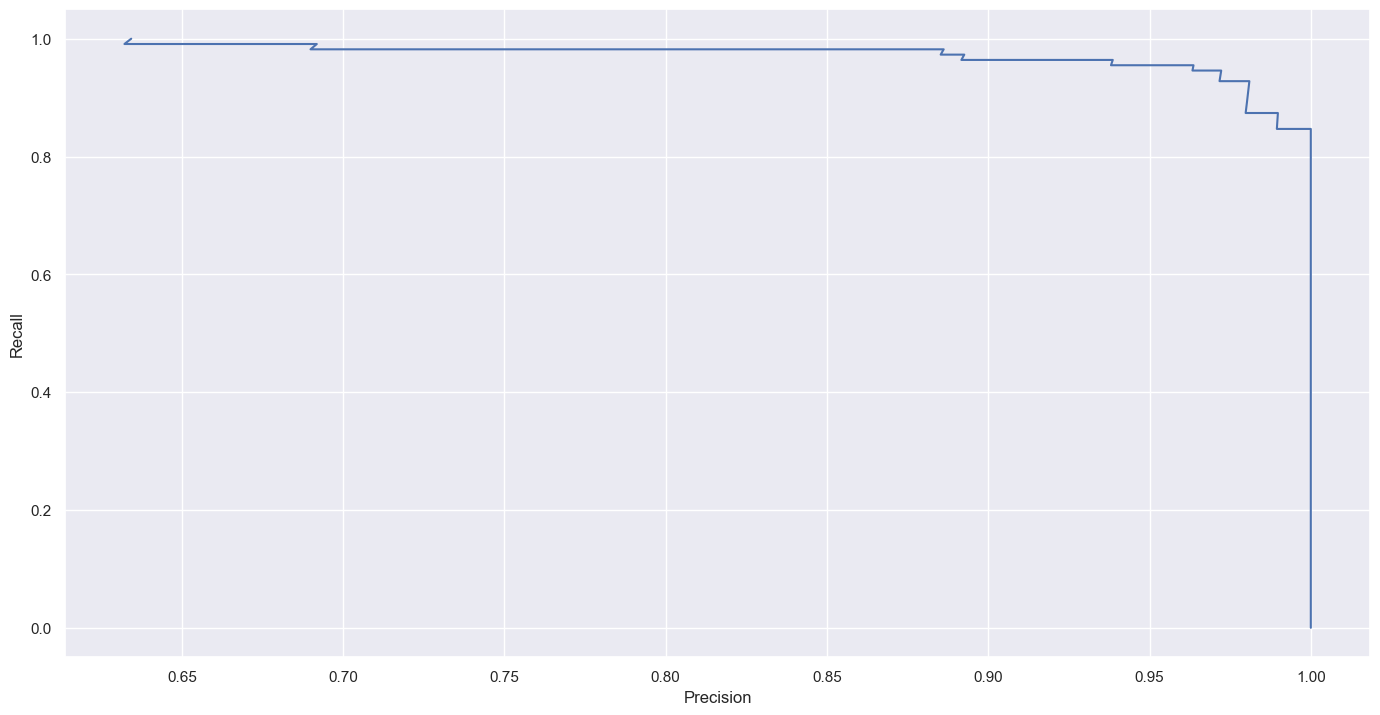

In [42]:
plt.plot(precisions,recalls)
plt.xlabel("Precision")
plt.ylabel("Recall");